In [63]:
import numpy as np
from tqdm import tqdm
import cv2

np.random.seed(999)

n = 1000
X = np.zeros((n, 224, 224, 3), dtype=np.uint8)
y = np.zeros((n, 1), dtype=np.uint8)

for i in tqdm(range(n//2)):
    X[i] = cv2.resize(cv2.imread('train/cat.%d.jpg' % i),(224, 224))
    X[i+n//2] = cv2.resize(cv2.imread('train/dog.%d.jpg' % i),(224, 224))

y[n//2:] = 1

100%|██████████| 500/500 [00:02<00:00, 175.34it/s]


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
"""
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
print (X_train.shape)
"""
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.layers import  GlobalAveragePooling2D, Dropout, Dense,Input
base_model = ResNet50(input_tensor=Input((224, 224, 3)), weights='imagenet', include_top=False)

for layers in base_model.layers:
    layers.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, x)


model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
"""
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()
#c1
model.add(Convolution2D(
    batch_input_shape=(None, 28, 28, 3),
    filters=32,
    kernel_size=1,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first'))

model.add(Activation('relu'))

model.add(MaxPooling2D(
    pool_size=1,
    strides=1,
    padding='same',    # Padding method
    data_format='channels_first',
))

model.add(Convolution2D(64, 1, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(1, 1, 'same', data_format='channels_first'))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(2))
model.add(Activation('softmax'))

adam = Adam(lr=1e-7)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
"""


"\nfrom keras.utils import np_utils\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten\nfrom keras.optimizers import Adam\n\nmodel = Sequential()\n#c1\nmodel.add(Convolution2D(\n    batch_input_shape=(None, 28, 28, 3),\n    filters=32,\n    kernel_size=1,\n    strides=1,\n    padding='same',     # Padding method\n    data_format='channels_first'))\n\nmodel.add(Activation('relu'))\n\nmodel.add(MaxPooling2D(\n    pool_size=1,\n    strides=1,\n    padding='same',    # Padding method\n    data_format='channels_first',\n))\n\nmodel.add(Convolution2D(64, 1, strides=1, padding='same', data_format='channels_first'))\nmodel.add(Activation('relu'))\n\n# Pooling layer 2 (max pooling) output shape (64, 7, 7)\nmodel.add(MaxPooling2D(1, 1, 'same', data_format='channels_first'))\n\nmodel.add(Flatten())\nmodel.add(Dense(1024))\nmodel.add(Activation('relu'))\n\n# Fully connected layer 2 to shape (10) for 10 classes\nmodel.add(Dense(2))

In [67]:
model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 429s - loss: 0.6289 - acc: 0.6587 - val_loss: 0.3427 - val_acc: 0.8950
Epoch 2/5
800/800 [==============================] - 432s - loss: 0.3608 - acc: 0.8662 - val_loss: 0.1942 - val_acc: 0.9650
Epoch 3/5
800/800 [==============================] - 431s - loss: 0.2557 - acc: 0.9125 - val_loss: 0.1486 - val_acc: 0.9650
Epoch 4/5
800/800 [==============================] - 443s - loss: 0.2009 - acc: 0.9275 - val_loss: 0.1191 - val_acc: 0.9700
Epoch 5/5
800/800 [==============================] - 441s - loss: 0.1565 - acc: 0.9562 - val_loss: 0.1049 - val_acc: 0.9750


In [69]:
print('\nTesting ------------')

loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


Testing ------------
200/200 [==============================] - 96s    

test loss:  0.104900628328

test accuracy:  0.975


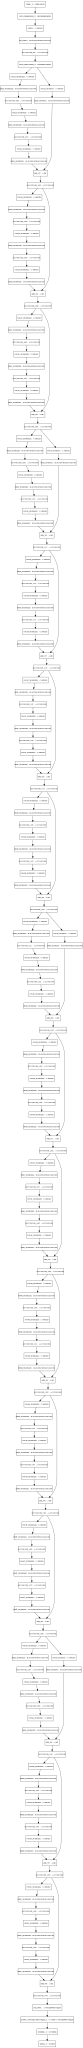

In [70]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [71]:
zip([x.name for x in model.layers], range(len(model.layers)))

In [72]:
weights = model.layers[177].get_weights()[0]
model2 = Model(model.input, [model.layers[172].output, model.output])

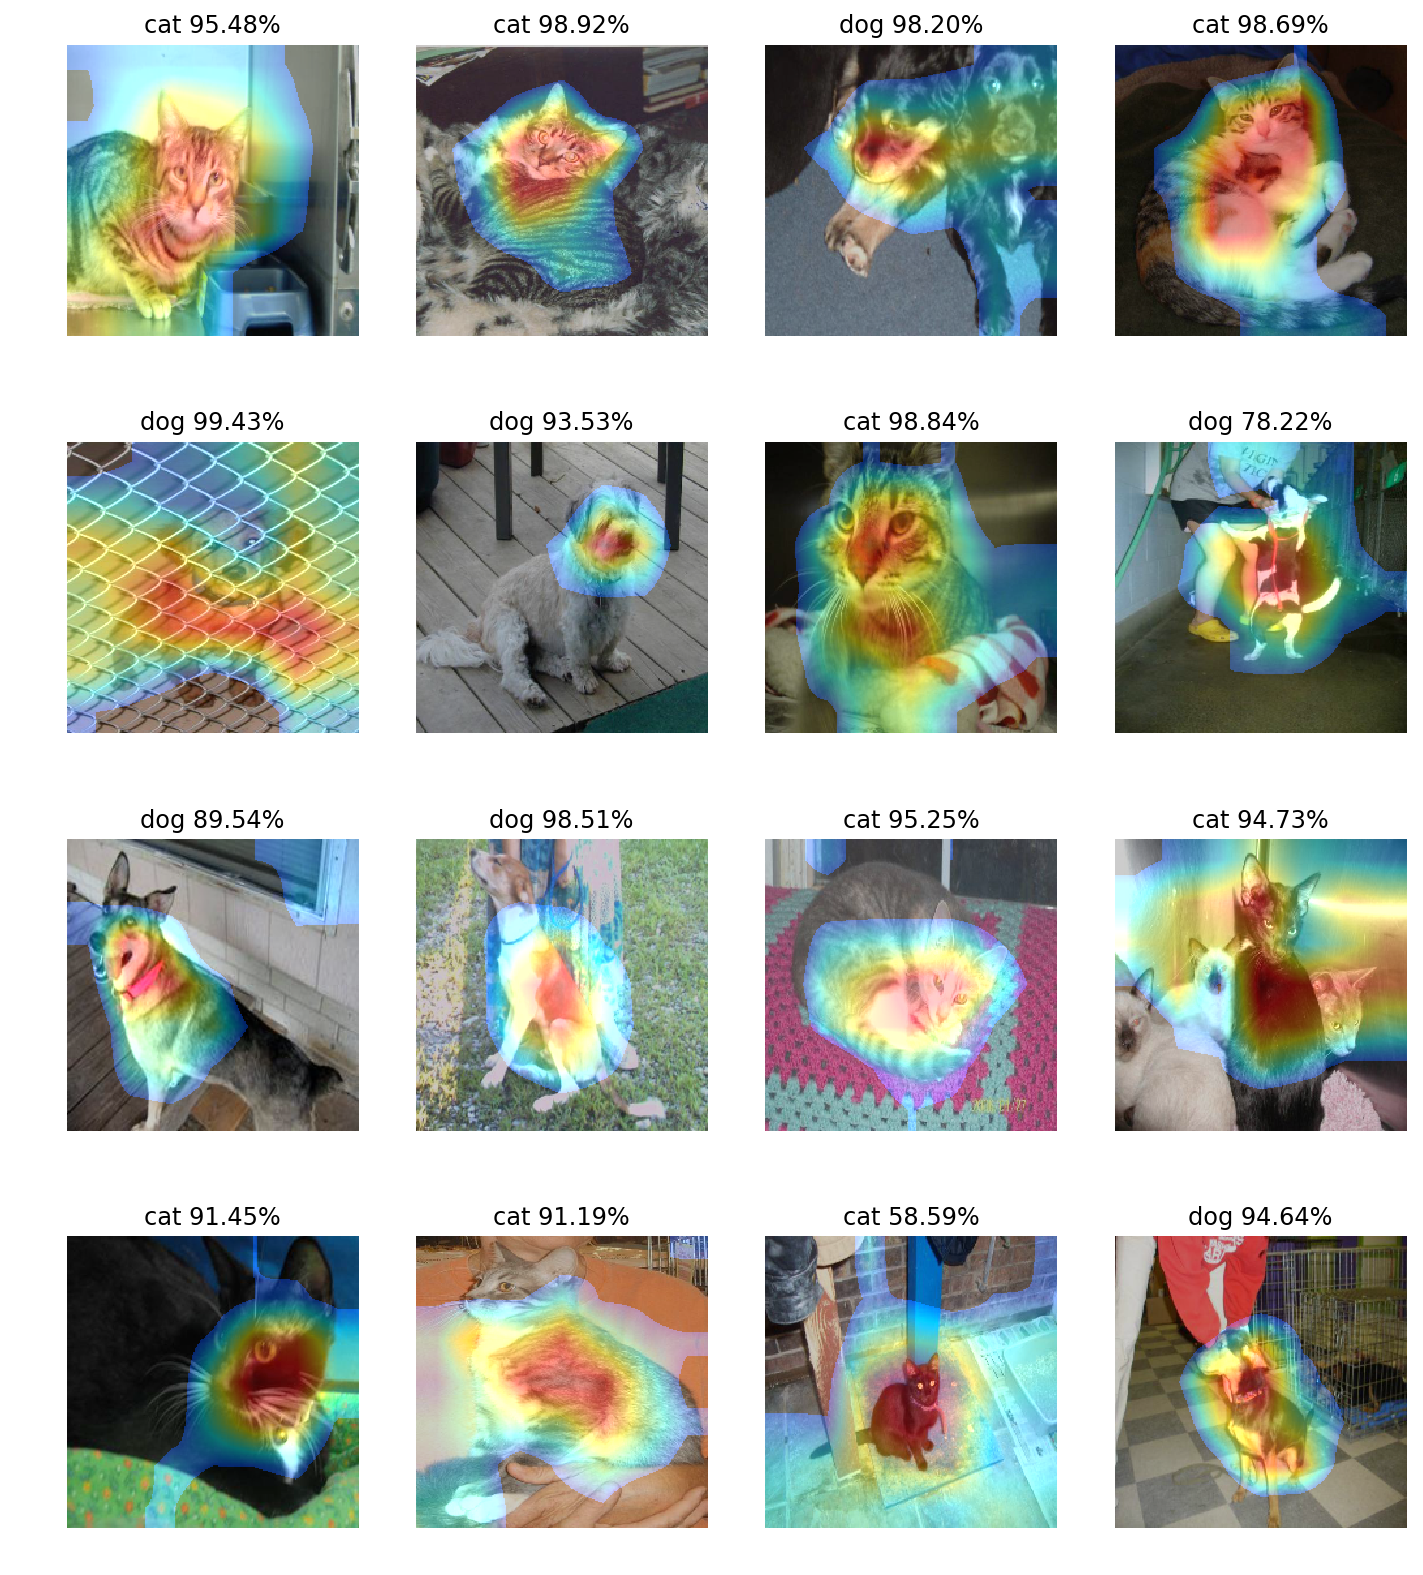

In [73]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('test/test/%d.jpg' % random.randint(1, 12500))
    img = cv2.resize(img, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]
    out = out[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))

    cam = (prediction - 0.5) * np.matmul(out, weights)
    cam -= cam.min()
    cam /= cam.max()
    cam -= 0.2
    cam /= 0.8

    cam = cv2.resize(cam, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    heatmap[np.where(cam <= 0.2)] = 0

    out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

    plt.axis('off')
    plt.imshow(out[:,:,::-1])

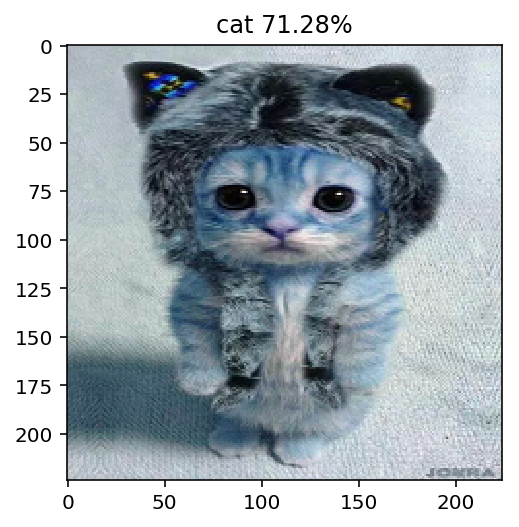

In [74]:
    img = cv2.imread('1.jpg')
    img = cv2.resize(img, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]
    out = out[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))
    plt.imshow(img)
    